downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


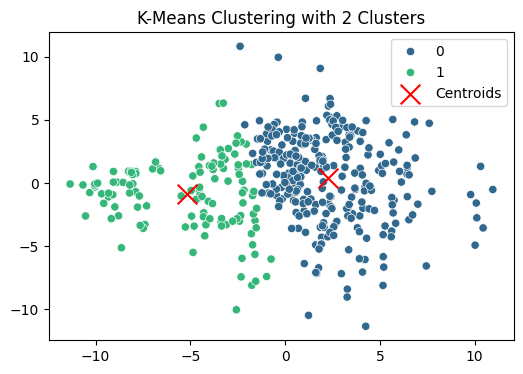

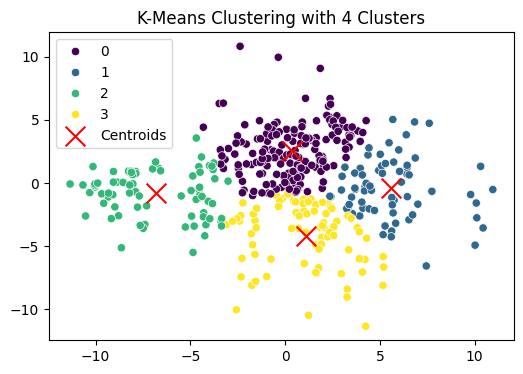

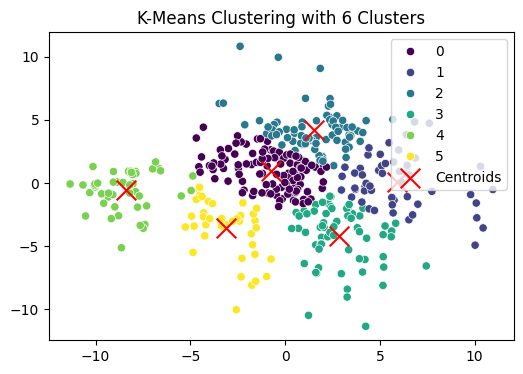

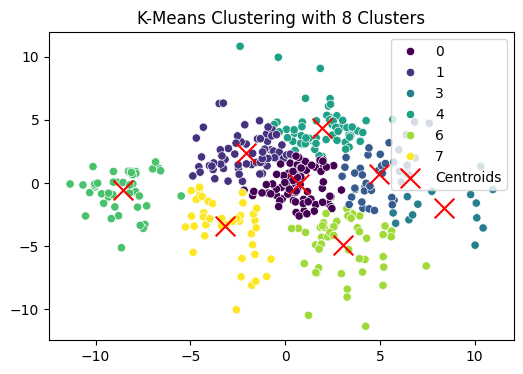

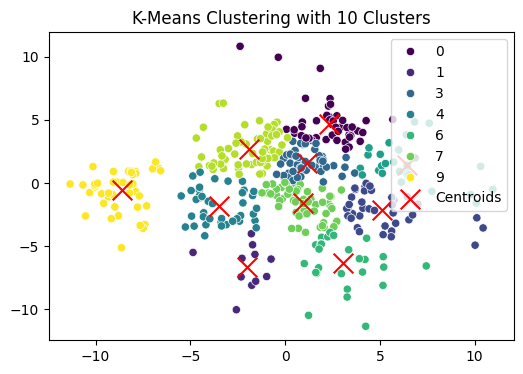

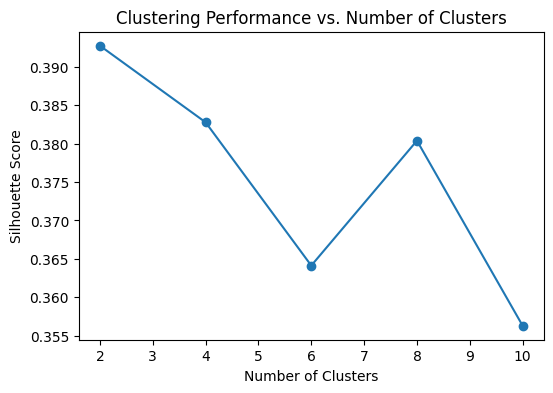

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

def initialize_centroids(data: np.ndarray, n_clusters: int) -> np.ndarray:
    """Randomly initialize cluster centroids from the data."""
    indices = np.random.choice(data.shape[0], n_clusters, replace=False)
    return data[indices]

def assign_clusters(data: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data: np.ndarray, labels: np.ndarray, n_clusters: int) -> np.ndarray:
    """Recompute centroids as the mean of assigned points."""
    return np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])

def get_clusters(data: np.ndarray, n_clusters: int, max_iters: int = 100, tol: float = 1e-4) -> tuple[np.ndarray, np.ndarray]:
    """K-Means clustering algorithm."""
    centroids = initialize_centroids(data, n_clusters)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, n_clusters)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return centroids, labels

# Load the Olivetti dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
data = faces.data  # Flattened images (400 samples, 64x64 pixels)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Apply K-means with different cluster numbers
n_clusters_list = [2, 4, 6, 8, 10]
silhouette_scores = []

for n_clusters in n_clusters_list:
    centroids, labels = get_clusters(data_2d, n_clusters)
    score = silhouette_score(data_2d, labels)
    silhouette_scores.append(score)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=labels, palette='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.legend()
    plt.show()

# Plot Silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(n_clusters_list, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Clustering Performance vs. Number of Clusters')
plt.show()
